In [1]:
import os
import numpy as np
from bmspeech.core import Email, Worker
from bmspeech.pagerank import PageRanker
from bmspeech.utils import create_local_vec, generate_counts_from_weights, print_top

##  Load emails and filter

In [2]:
box = Email.from_file('../../mail/allmail.mbox')
daniels_email = os.environ['DANIELS_EMAIL'] # for privacy
dan_box = box.filter_by_email(by=daniels_email, to=daniels_email)

In [3]:
dan_box.content[0]

'hey, you there?\r\n\r\n'

## Tokenize

In [4]:
worker = Worker()
tokens = worker.tokenize_msgs(dan_box.content, num_merge=1)

## Local Page Rank

In [5]:
p = PageRanker(worker.word_count_matrix)

In [6]:
local_vec = create_local_vec('lsu', mapper=worker)
eig = p.local_page_rank(local_vec=local_vec, alpha=0.65)
print_top(eig, mapper=worker, n=25, display_vals=True)

1.) lsu: 0.7023595932419531
2.) bama: 0.03990560863598173
3.) bet: 0.00954013252033398
4.) book: 0.007256432376739793
5.) bettor: 0.006242767504788802
6.) win: 0.005174877304370282
7.) qualify: 0.004896659678795225
8.) ben: 0.004743793831979292
9.) mac: 0.0046526636654715976
10.) extent: 0.004027493323190497
11.) disagree: 0.003507042441637639
12.) remember: 0.0034017236133874183
13.) score: 0.003168320881610788
14.) louisiana: 0.003133324264603954
15.) requirement: 0.00312177833348982
16.) massive: 0.003087115759243481
17.) majority: 0.0028491292855168165
18.) convinced: 0.002796053031018031
19.) favorite: 0.0027189846281773897
20.) lucky: 0.002468643480409144
21.) predict: 0.0024160077862451983
22.) texas: 0.002338889985121989
23.) rice: 0.002160046814567642
24.) size: 0.0021472772665850396
25.) house: 0.0021275296915982114


## Word Cloud

In [7]:
%matplotlib inline
from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt

In [8]:
fake_counts = generate_counts_from_weights(eig, worker)

In [9]:
d = '../images/lsu.png'
image_file = Image.open(d)
mask = np.array(image_file)

In [10]:
wordcloud = WordCloud(mask=mask, margin=10, 
                      max_words=250, relative_scaling=0.25, min_font_size=10,
                     max_font_size=125).generate_from_frequencies(fake_counts)

(-0.5, 1919.5, 1079.5, -0.5)

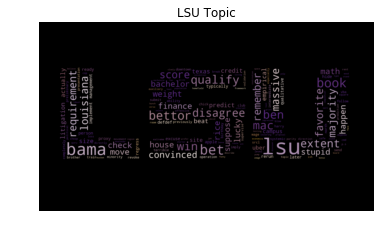

In [11]:
image_colors = ImageColorGenerator(mask)
plt.title("LSU Topic")
plt.imshow(wordcloud.recolor(color_func=image_colors, random_state=3),
            interpolation="bilinear")
wordcloud.to_file("../images/lsu_topic_cloud.png")
plt.axis("off")